Expected Value vs. CVaR Comparison

Mauricio Tombini, Jordan Jalving, and Victor M. Zavala 2016 

University of Wisconsin-Madison 

In [25]:
# Loading packages:
using JuMP 
using Distributions 
using Ipopt
using PyPlot

In [26]:
# Generate random data: 
NS = 100
S = collect(1:NS); 
srand(0)
μ = 0; σ = 2; 
d = Normal(μ,σ)
R = rand(d,NS);

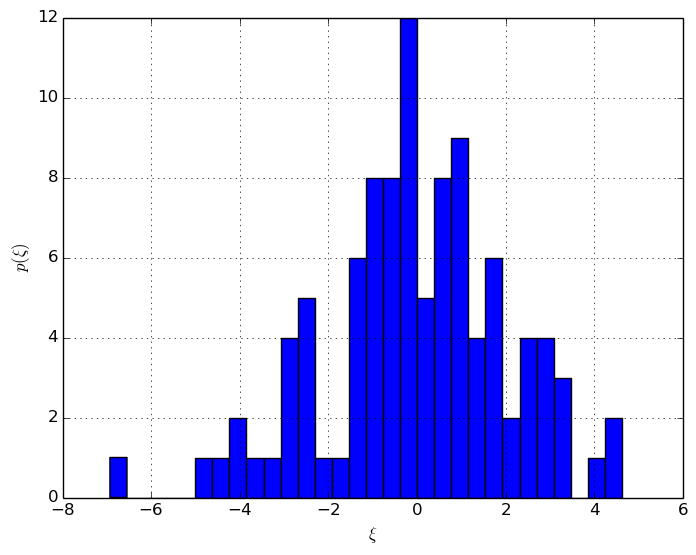

PyObject <matplotlib.text.Text object at 0x7f36ce868f10>

In [27]:
# Plotting data
plt[:hist](R, bins = 30);
grid("on")
xlabel(L"\xi")
ylabel(L"p(\xi)")

Solve expected value problem

In [28]:
# ex1gauss.mod 
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)            # decision variable
@variable(m, cost[1:NS])   # per scenario cost
@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2) 

@objective(m, Min, (1/NS)*sum{cost[s], s in S})

solve(m)
solcost = getvalue(cost);
println("x=",getvalue(x))
println("mean=",getobjectivevalue(m))
println("meanR=",(1/NS)*sum(R))

x=-0.049640963099936354
mean=4.41838656225072
meanR=-0.04964096309993612


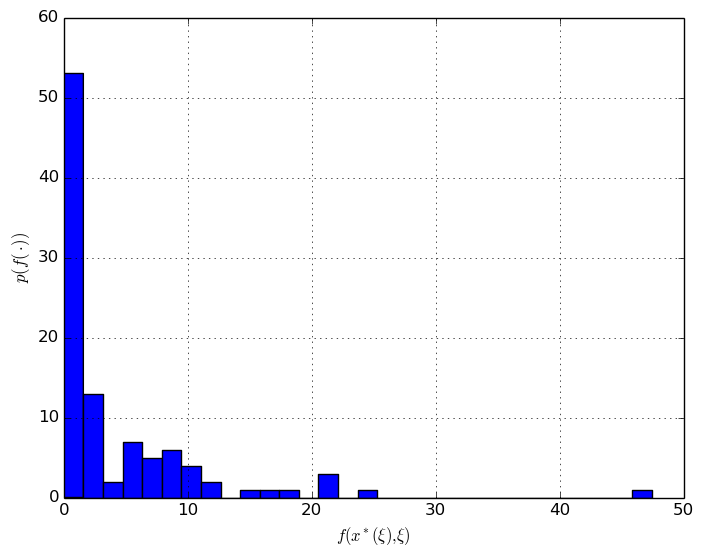

PyObject <matplotlib.text.Text object at 0x7f36cea949d0>

In [29]:
# Plotting cost fistribution 
plt[:hist](solcost,bins = 30)
grid("on")
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")

Solve CVaR Problem

In [30]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)              # decision variable
@variable(m, cost[1:NS])     # per scenario cost
@variable(m, VaR)            # cvar auxiliary variable
@variable(m, phi[S] >= 0)    # cvar auxiliary variable

# set cvar probability level
alpha = 0.0001;               

@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2) 
@constraint(m, cvar[s in S], cost[s]-VaR <= phi[s])

@objective(m, Min, VaR + (1/NS)*sum{(1/alpha)*phi[s], s in S})

solve(m)
solcost2 = getvalue(cost);
println("x=",getvalue(x))
println("CVaR=",getobjectivevalue(m))
println("mean=",(1/NS)*sum(solcost2))

x=-1.153574009577105
CVaR=33.42170024257977
mean=5.637054734120719


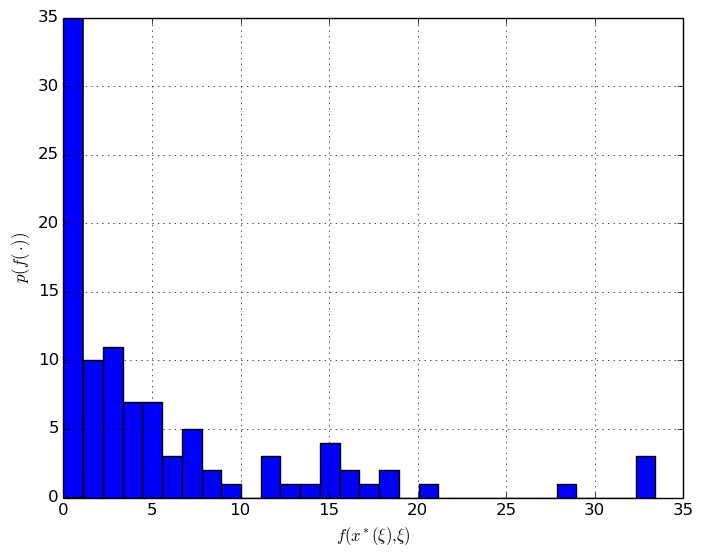

PyObject <matplotlib.text.Text object at 0x7f36ce8d3c50>

In [31]:
# Plotting cost fistribution 
plt[:hist](solcost2,bins = 30)
grid("on")
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")

In [32]:
solcost

100-element Array{Float64,1}:
  1.98206  
  2.91203  
  0.430827 
  0.0484294
  1.49542  
  0.415139 
  0.0322332
  0.0283565
  0.95801  
 10.2291   
  1.76404  
  2.17848  
  0.713359 
  ⋮        
  0.159064 
  8.91362  
  0.870091 
 11.5833   
  0.277311 
 21.8764   
  0.0130099
  7.42689  
  6.19464  
  5.7317   
  0.317498 
  2.71941  